In [1]:



!black exercise_1.ipynb


Python 3.12.5 has a memory safety issue that can cause Black's AST safety checks to fail. Please upgrade to Python 3.12.6 or downgrade to Python 3.12.4


In [112]:
import pandas as pd

national_test_file_path = "data/riket2023_åk9_np.xlsx"

sheet_names = pd.ExcelFile(national_test_file_path).sheet_names

df_dict = {}
for sheet_name in sheet_names[:-1]:
    df_dict[sheet_name] = pd.read_excel(
        national_test_file_path, skiprows=8, sheet_name=sheet_name
    )

df_dict["Matematik"]
# itereate through sheetnames
# read each sheet into a dictionary of dataframes
# df = pd.read_excel('data/riket2023_åk9_np.xlsx',skiprows= 8)

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [113]:
subjects = list(df_dict.keys())
subjects

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

# Change name of columns

In [114]:
df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', 'Totalt', 'Flickor', 'Pojkar', 'Totalt ',
       'Flickor ', 'Pojkar ', 'Totalt  ', 'Flickor  ', 'Pojkar  '],
      dtype='object')

In [115]:
import numpy as np

postfixes = [""] * 2 + ["(A-F)"] * 3 + ["(A-E)"] * 3 + [("Poäng")] * 3


df_dict["Engelska"].columns.str.strip() + np.array(postfixes)

Index(['Riket', 'Typ av huvudman', 'Totalt(A-F)', 'Flickor(A-F)',
       'Pojkar(A-F)', 'Totalt(A-E)', 'Flickor(A-E)', 'Pojkar(A-E)',
       'TotaltPoäng', 'FlickorPoäng', 'PojkarPoäng'],
      dtype='object')

In [128]:
from copy import deepcopy

df_dict_cleaned = deepcopy(df_dict)

for subject in subjects:
    new_columns = df_dict_cleaned[subject].columns.str.strip() + np.array(postfixes)
    df_dict_cleaned[subject].columns = new_columns
    df_dict_cleaned[subject] = df_dict_cleaned[subject].rename(
        {"Riket": "Plats", "Typ av huvudman": "Huvudman"}, axis=1
    )
df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt(A-E),Flickor(A-E),Pojkar(A-E),TotaltPoäng,FlickorPoäng,PojkarPoäng
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


# EDA

In [129]:
df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt(A-E),Flickor(A-E),Pojkar(A-E),TotaltPoäng,FlickorPoäng,PojkarPoäng
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [130]:
df_dict_cleaned["Matematik"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Plats         4 non-null      object 
 1   Huvudman      4 non-null      object 
 2   Totalt(A-F)   4 non-null      int64  
 3   Flickor(A-F)  4 non-null      int64  
 4   Pojkar(A-F)   4 non-null      int64  
 5   Totalt(A-E)   4 non-null      object 
 6   Flickor(A-E)  4 non-null      object 
 7   Pojkar(A-E)   4 non-null      object 
 8   TotaltPoäng   4 non-null      float64
 9   FlickorPoäng  4 non-null      float64
 10  PojkarPoäng   4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [133]:
df_dict_cleaned["Matematik"]["Totalt(A-F)"]

0    106766
1     84163
2     22553
3        50
Name: Totalt(A-F), dtype: int64

In [135]:
df_dict_cleaned["Matematik"].columns

Index(['Plats', 'Huvudman', 'Totalt(A-F)', 'Flickor(A-F)', 'Pojkar(A-F)',
       'Totalt(A-E)', 'Flickor(A-E)', 'Pojkar(A-E)', 'TotaltPoäng',
       'FlickorPoäng', 'PojkarPoäng'],
      dtype='object')

In [137]:
df_dict_cleaned["Matematik"].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Totalt(A-F),4.0,53383.000,50305.900509,50.0,16927.250,53358.00,89813.750,106766.0
Flickor(A-F),4.0,25774.000,24187.203159,25.0,8359.000,25761.50,43176.500,51548.0
Pojkar(A-F),4.0,27609.000,26119.924770,25.0,8568.250,27596.50,46637.250,55218.0
TotaltPoäng,4.0,12.650,1.138713,11.6,11.825,12.45,13.275,14.1
FlickorPoäng,4.0,12.400,0.920145,11.5,11.725,12.30,12.975,13.5
PojkarPoäng,4.0,12.875,1.357387,11.7,11.925,12.55,13.500,14.7


## Amount of students that got F in math

In [142]:
# totalt (A-F) - all students in a Huvudman
# Totalt (A-E) - all students that have passed in a Huvudman
# pick Huvudman samtliga

df_math = df_dict_cleaned["Matematik"]
df_math

In [146]:
import duckdb

total_students = (
    duckdb.query(
        """
    select "Totalt(A-F)"
    From df_math
    where huvudman = 'Samtliga'
"""
    )
    .df()
    .values[0][0]
)

total_students

np.int64(106766)

In [149]:
students_passed = (
    df_math.query("Huvudman == 'Samtliga'")["Totalt(A-E)"] * 0.01 * total_students
)
students_passed

0    95128.506
Name: Totalt(A-E), dtype: object

In [153]:
students_failed = total_students - students_passed
students_failed

0    11637.494
Name: Totalt(A-E), dtype: object

Bar

In [17]:
import pandas as pd

xls = pd.read_excel("data/riket2023_åk9_np.xlsx", sheet_name=None)
print("Tillgängliga blad:")
for sheet in xls.keys():
    print(sheet)

Tillgängliga blad:
Engelska
Matematik
Svenska
Svenska som andraspråk
Rapportbeskrivning och def.


In [18]:
val = input("Välj sheet:")
df = xls.get(val)
if df is not None:
    print(df.head())
else:
    print("Bladnamnet finns inte")

                                          Unnamed: 0 Unnamed: 1 Unnamed: 2  \
0                                                NaN        NaN        NaN   
1  Grundskolan - Resultat nationella prov årskurs...        NaN        NaN   
2                                           Engelska        NaN        NaN   
3                                Valt läsår: 2022/23        NaN        NaN   
4                                                NaN        NaN        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9 Unnamed: 10  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         Na

In [21]:
excel_file = pd.ExcelFile("data/riket2023_åk9_np.xlsx")
print(excel_file.sheet_names)

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk', 'Rapportbeskrivning och def.']


In [34]:
df = pd.read_excel("data/riket2023_åk9_np.xlsx")

# df = df.dropna(how= 'all',axis=1)
# df = df.dropna(how= 'all', axis=0)

# print(df.head())

df.dropna(inplace=True)

In [40]:
df_matematik = excel_file.parse("Matematik")
df_matematik.dropna(inplace=True)
df_matematik

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
7,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
8,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12
9,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
10,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13,12.8,13.1
11,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [41]:
df_svenska = excel_file.parse("Svenska")
df_svenska.dropna(inplace=True)
df_svenska.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
7,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
8,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
9,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
10,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
11,Riket,Skolverket,40,19,21,100,100,100,15,15.9,14.2


In [43]:
df_svenska2 = excel_file.parse("Svenska som andraspråk")
df_svenska2.dropna(inplace=True)
df_svenska2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
7,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
8,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
9,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
10,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
11,Riket,Skolverket,..,..,..,..,..,..,..,..,..


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
7,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
8,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
9,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
10,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
11,Riket,Skolverket,..,..,..,..,..,..,..,..,..


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 7 to 11
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5 non-null      object
 1   Unnamed: 1   5 non-null      object
 2   Unnamed: 2   5 non-null      object
 3   Unnamed: 3   5 non-null      object
 4   Unnamed: 4   5 non-null      object
 5   Unnamed: 5   5 non-null      object
 6   Unnamed: 6   5 non-null      object
 7   Unnamed: 7   5 non-null      object
 8   Unnamed: 8   5 non-null      object
 9   Unnamed: 9   5 non-null      object
 10  Unnamed: 10  5 non-null      object
dtypes: object(11)
memory usage: 480.0+ bytes


In [52]:
# Ta bort rader där alla kolumner är "Unnamed"
df = df[~df.apply(lambda row: row.str.contains("Unnamed", na=False).all(), axis=1)]

# Sätt nya kolumnnamn
df.columns = [
    "Plats",
    "Huvudman",
    "Totalt (A-F)",
    "Flickor (A-F)",
    "Pojkar (A-F)",
    "Totalt (A-E)",
    "Flickor (A-E)",
    "Pojkar (A-E)",
    "Totalt (poäng)",
    "Flickor (poäng)",
    "Pojkar (poäng)",
]

# Skriv ut den uppdaterade DataFrame
df.head()

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
7,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
8,Riket,Samtliga,106941,51864,55077,97,97.1,97,15.7,15.8,15.7
9,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
10,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17,16.8
11,Riket,Skolverket,49,24,25,100,100,100,18.5,18.9,18.2


In [77]:
df.index = pd.RangeIndex(start=1, stop=1 + len(df), step=1)
df_matematik.index = pd.RangeIndex(start=0, stop=0 + len(df_matematik), step=1)
df_matematik

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
1,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12
2,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
3,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13,12.8,13.1
4,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [59]:
df_matematik = df_matematik[
    ~df_matematik.apply(lambda row: row.str.contains("Unnamed", na=False).all(), axis=1)
]

# Sätt nya kolumnnamn
df_matematik.columns = [
    "Plats",
    "Huvudman",
    "Totalt (A-F)",
    "Flickor (A-F)",
    "Pojkar (A-F)",
    "Totalt (A-E)",
    "Flickor (A-E)",
    "Pojkar (A-E)",
    "Totalt (poäng)",
    "Flickor (poäng)",
    "Pojkar (poäng)",
]

In [60]:
df_matematik

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
1,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
2,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12
3,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
4,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13,12.8,13.1
5,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [76]:
df_svenska = df_svenska[
    ~df_svenska.apply(lambda row: row.str.contains("Unnamed", na=False).all(), axis=1)
]

# Sätt nya kolumnnamn
df_svenska.columns = [
    "Plats",
    "Huvudman",
    "Totalt (A-F)",
    "Flickor (A-F)",
    "Pojkar (A-F)",
    "Totalt (A-E)",
    "Flickor (A-E)",
    "Pojkar (A-E)",
    "Totalt (poäng)",
    "Flickor (poäng)",
    "Pojkar (poäng)",
]
df_svenska.index = pd.RangeIndex(start=0, stop=0 + len(df_svenska), step=1)
df_svenska

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
1,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
2,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
3,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
4,Riket,Skolverket,40,19,21,100,100,100,15,15.9,14.2


In [74]:
df_svenska2 = df_svenska2[
    ~df_svenska2.apply(lambda row: row.str.contains("Unnamed", na=False).all(), axis=1)
]

# Sätt nya kolumnnamn
df_svenska2.columns = [
    "Plats",
    "Huvudman",
    "Totalt (A-F)",
    "Flickor (A-F)",
    "Pojkar (A-F)",
    "Totalt (A-E)",
    "Flickor (A-E)",
    "Pojkar (A-E)",
    "Totalt (poäng)",
    "Flickor (poäng)",
    "Pojkar (poäng)",
]
df_svenska2.index = pd.RangeIndex(start=0, stop=0 + len(df_svenska2), step=1)

In [75]:
df_svenska2

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
1,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
2,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
3,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
4,Riket,Skolverket,..,..,..,..,..,..,..,..,..


In [88]:
df_eng = df
#
df_eng.index = pd.RangeIndex(start=0, stop=0 + len(df_eng), step=1)
df_eng

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
1,Riket,Samtliga,106941,51864,55077,97,97.1,97,15.7,15.8,15.7
2,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
3,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17,16.8
4,Riket,Skolverket,49,24,25,100,100,100,18.5,18.9,18.2


In [94]:
df_matematik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Plats            5 non-null      object
 1   Huvudman         5 non-null      object
 2   Totalt (A-F)     5 non-null      object
 3   Flickor (A-F)    5 non-null      object
 4   Pojkar (A-F)     5 non-null      object
 5   Totalt (A-E)     5 non-null      object
 6   Flickor (A-E)    5 non-null      object
 7   Pojkar (A-E)     5 non-null      object
 8   Totalt (poäng)   5 non-null      object
 9   Flickor (poäng)  5 non-null      object
 10  Pojkar (poäng)   5 non-null      object
dtypes: object(11)
memory usage: 572.0+ bytes


In [107]:
df_matematik["Totalt (A-F)"] = pd.to_numeric(
    df_matematik["Totalt (A-F)"], errors="coerce"
)
df_matematik["Totalt (A-E)"] = pd.to_numeric(
    df_matematik["Totalt (A-E)"], errors="coerce"
)

df_matematik["Totalt F"] = df_matematik["Totalt (A-F)"] - df_matematik["Totalt (A-E)"]
total_f_students = int(df_matematik["Totalt F"].sum())
print(f"Totalt antal elever som fick F i Matematik: {total_f_students}")

Totalt antal elever som fick F i Matematik: 213211


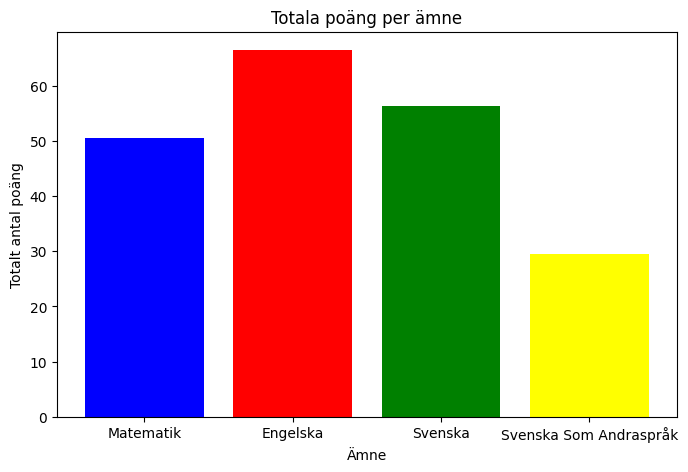

In [114]:
import matplotlib.pyplot as plt

df_matematik["Totalt (poäng)"] = pd.to_numeric(
    df_matematik["Totalt (poäng)"], errors="coerce"
)
df_svenska["Totalt (poäng)"] = pd.to_numeric(
    df_svenska["Totalt (poäng)"], errors="coerce"
)
df_eng["Totalt (poäng)"] = pd.to_numeric(df_eng["Totalt (poäng)"], errors="coerce")
df_svenska2["Totalt (poäng)"] = pd.to_numeric(
    df_svenska2["Totalt (poäng)"], errors="coerce"
)


subjects = {
    "Matematik": df_matematik["Totalt (poäng)"].sum(),
    "Engelska": df_eng["Totalt (poäng)"].sum(),
    "Svenska": df_svenska["Totalt (poäng)"].sum(),
    "Svenska Som Andraspråk": df_svenska2["Totalt (poäng)"].sum(),
}

plt.figure(figsize=(8, 5))
plt.bar(subjects.keys(), subjects.values(), color=["blue", "red", "green", "yellow"])

plt.title("Totala poäng per ämne")
plt.xlabel("Ämne")
plt.ylabel("Totalt antal poäng")
plt.show()

In [116]:
df_prov = pd.read_excel("data/betyg_o_prov_riksnivå.xlsx")
df_prov.head()

,Grundskolan – Betyg och Prov – Riksnivå,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tabell 1A: Elever som avslutat årskurs 9 läsår...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Läsår\nHuvudman\nBakgrund,Elever som avslutat åk 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_prov.columns

Index(['Grundskolan – Betyg och Prov – Riksnivå', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [139]:
import duckdb

In [119]:
df_os = pd.read_excel("data/olympics-data.xlsx")
df_os.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [128]:
from tkinter.tix import Select
from duckdb import query

df_all = query("Select * from df_os").df()
# df_result = query("Select * FROM df_os").df_os()

In [130]:
print(df_all)

        athlete_id                   name   born_date        born_city  \
0                1  Jean-François Blanchy  1886-12-12         Bordeaux   
1                2         Arnaud Boetsch  1969-04-01           Meulan   
2                3           Jean Borotra  1898-08-13         Biarritz   
3                4        Jacques Brugnon  1895-05-11      Paris VIIIe   
4                5           Albert Canet  1878-04-17       Wandsworth   
...            ...                    ...         ...              ...   
145495      149222      Polina Luchnikova  2002-01-30            Serov   
145496      149223    Valeriya Merkusheva  1999-09-20  Moskva (Moscow)   
145497      149224        Yuliya Smirnova  1998-05-08           Kotlas   
145498      149225         André Foussard  1899-05-19            Niort   
145499      149814          Bill Phillips  1913-07-15     Dulwich Hill   

                 born_region born_country        NOC  height_cm  weight_kg  \
0                    Gironde     

In [144]:
df_os.info

<bound method DataFrame.info of         athlete_id                   name  born_date        born_city  \
0                1  Jean-François Blanchy 1886-12-12         Bordeaux   
1                2         Arnaud Boetsch 1969-04-01           Meulan   
2                3           Jean Borotra 1898-08-13         Biarritz   
3                4        Jacques Brugnon 1895-05-11      Paris VIIIe   
4                5           Albert Canet 1878-04-17       Wandsworth   
...            ...                    ...        ...              ...   
145495      149222      Polina Luchnikova 2002-01-30            Serov   
145496      149223    Valeriya Merkusheva 1999-09-20  Moskva (Moscow)   
145497      149224        Yuliya Smirnova 1998-05-08           Kotlas   
145498      149225         André Foussard 1899-05-19            Niort   
145499      149814          Bill Phillips 1913-07-15     Dulwich Hill   

                 born_region born_country        NOC  height_cm  weight_kg  \
0            

In [ ]:
from itertools import groupby
from os import name
from tokenize import group


df_os["born_date"] = pd.to_datetime(df_os["born_date"], errors="coerce")

df_os["age"] = (pd.Timestamp.today() - df_os["born_date"]).dt.days // 365

df_oldest = duckdb.query(
    """Select name,age ,sport
    from df_os 
    where age is not null
    order by age desc 
    limit 10
    """
).df()
print(df_oldest)

In [4]:
import pandas as pd

In [12]:
df_os = pd.read_csv("data/athlete_events.csv")

In [14]:
df_os["Medal"]

0          NaN
1          NaN
2          NaN
3         Gold
4          NaN
          ... 
271111     NaN
271112     NaN
271113     NaN
271114     NaN
271115     NaN
Name: Medal, Length: 271116, dtype: object

In [11]:
df_os.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
import duckdb

In [150]:
df_oldest = duckdb.query(
    """SELECT age,name,sport
from df_os where age is not null
order by age desc
limit 10
    """
)

In [151]:
df_oldest

┌────────┬────────────────────────────┬──────────────────┐
│  Age   │            Name            │      Sport       │
│ double │          varchar           │     varchar      │
├────────┼────────────────────────────┼──────────────────┤
│   97.0 │ John Quincy Adams Ward     │ Art Competitions │
│   96.0 │ Winslow Homer              │ Art Competitions │
│   88.0 │ Thomas Cowperthwait Eakins │ Art Competitions │
│   88.0 │ Thomas Cowperthwait Eakins │ Art Competitions │
│   88.0 │ Thomas Cowperthwait Eakins │ Art Competitions │
│   84.0 │ George Denholm Armour      │ Art Competitions │
│   81.0 │ Louis Tauzin               │ Art Competitions │
│   81.0 │ Robert Tait McKenzie       │ Art Competitions │
│   80.0 │ Max Liebermann             │ Art Competitions │
│   80.0 │ Max Liebermann             │ Art Competitions │
├────────┴────────────────────────────┴──────────────────┤
│ 10 rows                                      3 columns │
└───────────────────────────────────────────────────────

In [152]:
df_youngest = duckdb.query(
    """
select age,name,sport 
from df_os
where age is not null
order by age asc
limit 10 
"""
)

In [154]:
df_youngest

┌────────┬─────────────────────────────────────────────────┬────────────────┐
│  Age   │                      Name                       │     Sport      │
│ double │                     varchar                     │    varchar     │
├────────┼─────────────────────────────────────────────────┼────────────────┤
│   10.0 │ Dimitrios Loundras                              │ Gymnastics     │
│   11.0 │ Megan Olwen Devenish Taylor (-Mandeville-Ellis) │ Figure Skating │
│   11.0 │ Liana Vicens                                    │ Swimming       │
│   11.0 │ Liana Vicens                                    │ Swimming       │
│   11.0 │ Liana Vicens                                    │ Swimming       │
│   11.0 │ Liana Vicens                                    │ Swimming       │
│   11.0 │ Etsuko Inada                                    │ Figure Skating │
│   11.0 │ Liu Luyang                                      │ Figure Skating │
│   11.0 │ Marcelle Matthews                               │ Fig

In [155]:
df_median_age_highest = duckdb.query(
    """ SELECT sport, median(age) as median_age
from df_os
group by sport
order by median_age desc
limit 5
"""
)

In [156]:
df_median_age_highest

┌──────────────────┬────────────┐
│      Sport       │ median_age │
│     varchar      │   double   │
├──────────────────┼────────────┤
│ Roque            │       59.0 │
│ Art Competitions │       45.0 │
│ Alpinism         │       38.0 │
│ Polo             │       35.0 │
│ Shooting         │       33.0 │
└──────────────────┴────────────┘

In [157]:
df_median_age_lowest = duckdb.query(
    """ select sport,median(age) as median_age from df_os group by sport order by median_age asc limit 5
"""
)

In [158]:
df_median_age_lowest

┌───────────────────────┬────────────┐
│         Sport         │ median_age │
│        varchar        │   double   │
├───────────────────────┼────────────┤
│ Rhythmic Gymnastics   │       18.0 │
│ Swimming              │       20.0 │
│ Gymnastics            │       22.0 │
│ Synchronized Swimming │       22.0 │
│ Diving                │       22.0 │
└───────────────────────┴────────────┘

In [7]:
df_os.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [23]:



df_golds = duckdb.query("""
    select NOC,count (*) as Gold_Medals
    from df_os
    where Medal = 'Gold'
    group by NOC
    order by Gold_Medals DESC
    limit 10
    """).df()
print(df_golds)


   NOC  Gold_Medals
0  USA         2638
1  URS         1082
2  GER          745
3  GBR          678
4  ITA          575
5  FRA          501
6  SWE          479
7  CAN          463
8  HUN          432
9  GDR          397


In [26]:
df_medals = duckdb.query("""
select NOC, count(medal) as total_medals
from df_os
group by NOC
order by total_medals desc
limit 20
""")

In [27]:
df_medals

┌─────────┬──────────────┐
│   NOC   │ total_medals │
│ varchar │    int64     │
├─────────┼──────────────┤
│ USA     │         5637 │
│ URS     │         2503 │
│ GER     │         2165 │
│ GBR     │         2068 │
│ FRA     │         1777 │
│ ITA     │         1637 │
│ SWE     │         1536 │
│ CAN     │         1352 │
│ AUS     │         1320 │
│ RUS     │         1165 │
│ HUN     │         1135 │
│ NED     │         1040 │
│ NOR     │         1033 │
│ GDR     │         1005 │
│ CHN     │          989 │
│ JPN     │          913 │
│ FIN     │          900 │
│ SUI     │          691 │
│ ROU     │          653 │
│ KOR     │          638 │
├─────────┴──────────────┤
│ 20 rows      2 columns │
└────────────────────────┘

In [28]:
df_os.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [34]:
athletes_gender_year = df_os.groupby(['Year','Sex']).size().unstack(fill_value=0)

print(athletes_gender_year)

Sex      F      M
Year             
1896     0    380
1900    33   1903
1904    16   1285
1906    11   1722
1908    47   3054
1912    87   3953
1920   134   4158
1924   261   5432
1928   437   5137
1932   369   2952
1936   549   6852
1948   761   6719
1952  1682   7676
1956  1139   5295
1960  1730   7505
1964  1752   7728
1968  2193   8286
1972  2608   9351
1976  2606   7896
1980  2186   6751
1984  2983   8605
1988  4223  10453
1992  5178  11235
1994  1105   2055
1996  5008   8772
1998  1384   2221
2000  5431   8390
2002  1582   2527
2004  5546   7897
2006  1757   2625
2008  5816   7786
2010  1847   2555
2012  5815   7105
2014  2023   2868
2016  6223   7465


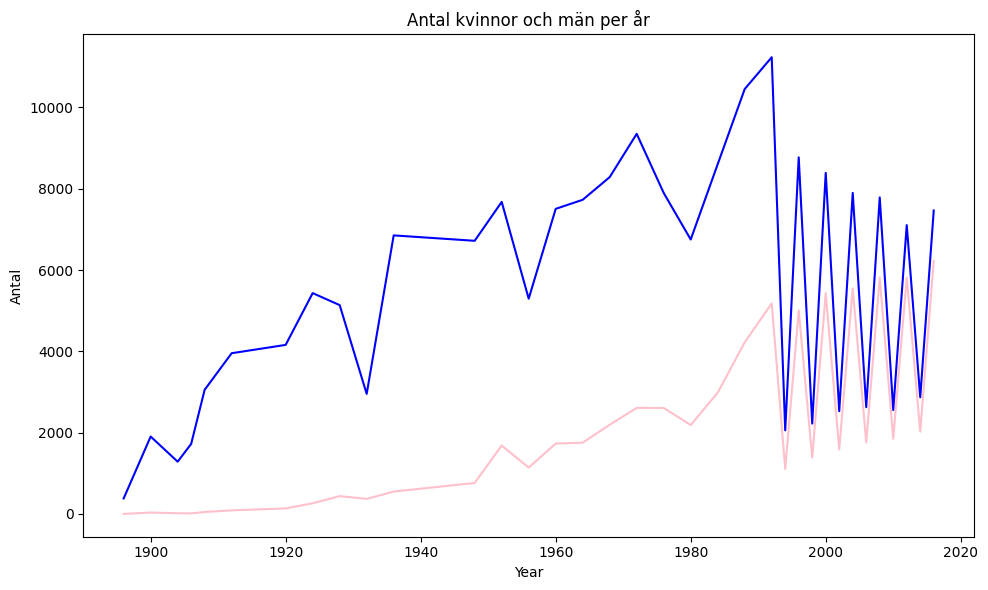

In [45]:
from cProfile import label
import matplotlib.pyplot as plt
from numpy import atleast_1d

plt.figure(figsize=(10,6))
plt.plot(athletes_gender_year.index,athletes_gender_year["F"],label="Female",color="pink")
plt.plot(athletes_gender_year.index,athletes_gender_year["M"],label="Male",color= "blue")

plt.title("Antal kvinnor och män per år")
plt.xlabel("Year")
plt.ylabel("Antal")


plt.tight_layout()

plt.show()